In [16]:
from body_matrix import load
from body_matrix import infer
from body_matrix import process

video, frame_counts, fps, sample_frame = load.video(
    "/Users/troydo42/Desktop/Body_Matrixes/samples/sample01.mp4", 
    -90, 
    1
)

keypoints_model, keypoints_transform = load.keypoints_model("cpu")
selected_box, keypoints = infer.detect_main_target(
    sample_frame, "cpu", 0.8, keypoints_model, keypoints_transform
)
selected_kps = process.keypoints_filter(
    [
        'left_shoulder','right_shoulder', 
        'left_hip', 'right_hip',  
        'left_elbow','right_elbow',
        'left_wrist', 'right_wrist',
        'left_ankle', 'right_ankle'], 
    keypoints
)

segment_model, segment_transform = load.segment_model("cpu")
mask, mask_image, bool_mask = infer.segment_selected_target(
    sample_frame, "cpu", selected_box, 0.99, segment_model, segment_transform
)

segment_area = process.segmentation_area(
    sample_frame, 
    bool_mask
)

Found  4  person in the frame
Distances:  [414.2865295410156, 307.45642852783203, 21.405029296875, 102.46954345703125]
Areas:  [132376.10708497465, 126076.31761448085, 341906.3982107714, 35486.17416322231]
FOCUSES:  [319.52790555761726, 410.0623890616357, 15973.180576804329, 346.3094785632845]
Select keypoint index 2
Found  4  person in the frame
[359.28662109375, 638.5205078125, 680.0598754882812, 1716.5322265625]
[360.81719970703125, 652.6331176757812, 684.3727416992188, 1709.349365234375]
[839.1361083984375, 725.3776245117188, 1087.300537109375, 1320.130615234375]
[360.81719970703125, 652.6331176757812, 684.3727416992188, 1709.349365234375]
[138.0543212890625, 716.6746826171875, 337.00531005859375, 1304.864013671875]
[360.81719970703125, 652.6331176757812, 684.3727416992188, 1709.349365234375]
[592.2968139648438, 725.72900390625, 705.1302490234375, 1037.45947265625]
[360.81719970703125, 652.6331176757812, 684.3727416992188, 1709.349365234375]
[4.532307970951144, 468.17510081061897, 

In [17]:
print(selected_kps)

{'left_shoulder': [431.9994201660156, 879.380859375], 'right_shoulder': [614.6285400390625, 899.5361328125], 'left_hip': [453.56982421875, 1161.5557861328125], 'right_hip': [574.3638305664062, 1167.314453125], 'left_ankle': [467.9500732421875, 1652.482666015625], 'right_ankle': [539.8512573242188, 1576.18017578125]}


In [18]:
ls = selected_kps['left_shoulder']
rs = selected_kps['right_shoulder']

def two_points_linear_constant(a, b):
    aX = a[0]
    aY = a[1]
    bX = b[0]
    bY = b[1]
    alpha = (bY - aY)/(bX - aX)
    beta = (bX * aY - bY * aX)/(bX - aX)
    return alpha, beta

alpha, beta = two_points_linear_constant(ls, rs)
print(alpha, beta)

0.11036177281865439 831.7046375088478


In [19]:
def find_segment_line(segment_area, alpha, beta):
    line_coordinates = []
    for idx, position in enumerate(segment_area):
        expectedY = alpha * position[0] + beta
        if position[1] == int(expectedY):
            line_coordinates.append(
                [position[0], position[1]]
            )
    return line_coordinates

In [20]:
shoulder_line_coordinates = find_segment_line(segment_area, alpha, beta)
shoulder_line_coordinates

[[402, 876],
 [403, 876],
 [404, 876],
 [405, 876],
 [406, 876],
 [407, 876],
 [408, 876],
 [409, 876],
 [410, 876],
 [411, 877],
 [412, 877],
 [413, 877],
 [414, 877],
 [415, 877],
 [416, 877],
 [417, 877],
 [418, 877],
 [419, 877],
 [420, 878],
 [421, 878],
 [422, 878],
 [423, 878],
 [424, 878],
 [425, 878],
 [426, 878],
 [427, 878],
 [428, 878],
 [429, 879],
 [430, 879],
 [431, 879],
 [432, 879],
 [433, 879],
 [434, 879],
 [435, 879],
 [436, 879],
 [437, 879],
 [438, 880],
 [439, 880],
 [440, 880],
 [441, 880],
 [442, 880],
 [443, 880],
 [444, 880],
 [445, 880],
 [446, 880],
 [447, 881],
 [448, 881],
 [449, 881],
 [450, 881],
 [451, 881],
 [452, 881],
 [453, 881],
 [454, 881],
 [455, 881],
 [456, 882],
 [457, 882],
 [458, 882],
 [459, 882],
 [460, 882],
 [461, 882],
 [462, 882],
 [463, 882],
 [464, 882],
 [465, 883],
 [466, 883],
 [467, 883],
 [468, 883],
 [469, 883],
 [470, 883],
 [471, 883],
 [472, 883],
 [473, 883],
 [474, 884],
 [475, 884],
 [476, 884],
 [477, 884],
 [478, 884],

In [21]:
if ls[0] < rs[0]:
    shoulder_kps = {
        'left_shoulder': shoulder_line_coordinates[0],
        'right_shoulder': shoulder_line_coordinates[-1]
    }

elif ls[0] > rs[0]:
    shoulder_kps = {
        'left_shoulder': shoulder_line_coordinates[-1],
        'right_shoulder': shoulder_line_coordinates[0]
    }
        
        
shoulder_kps

{'left_shoulder': [402, 876], 'right_shoulder': [633, 901]}

[402, 876]
[633, 901]


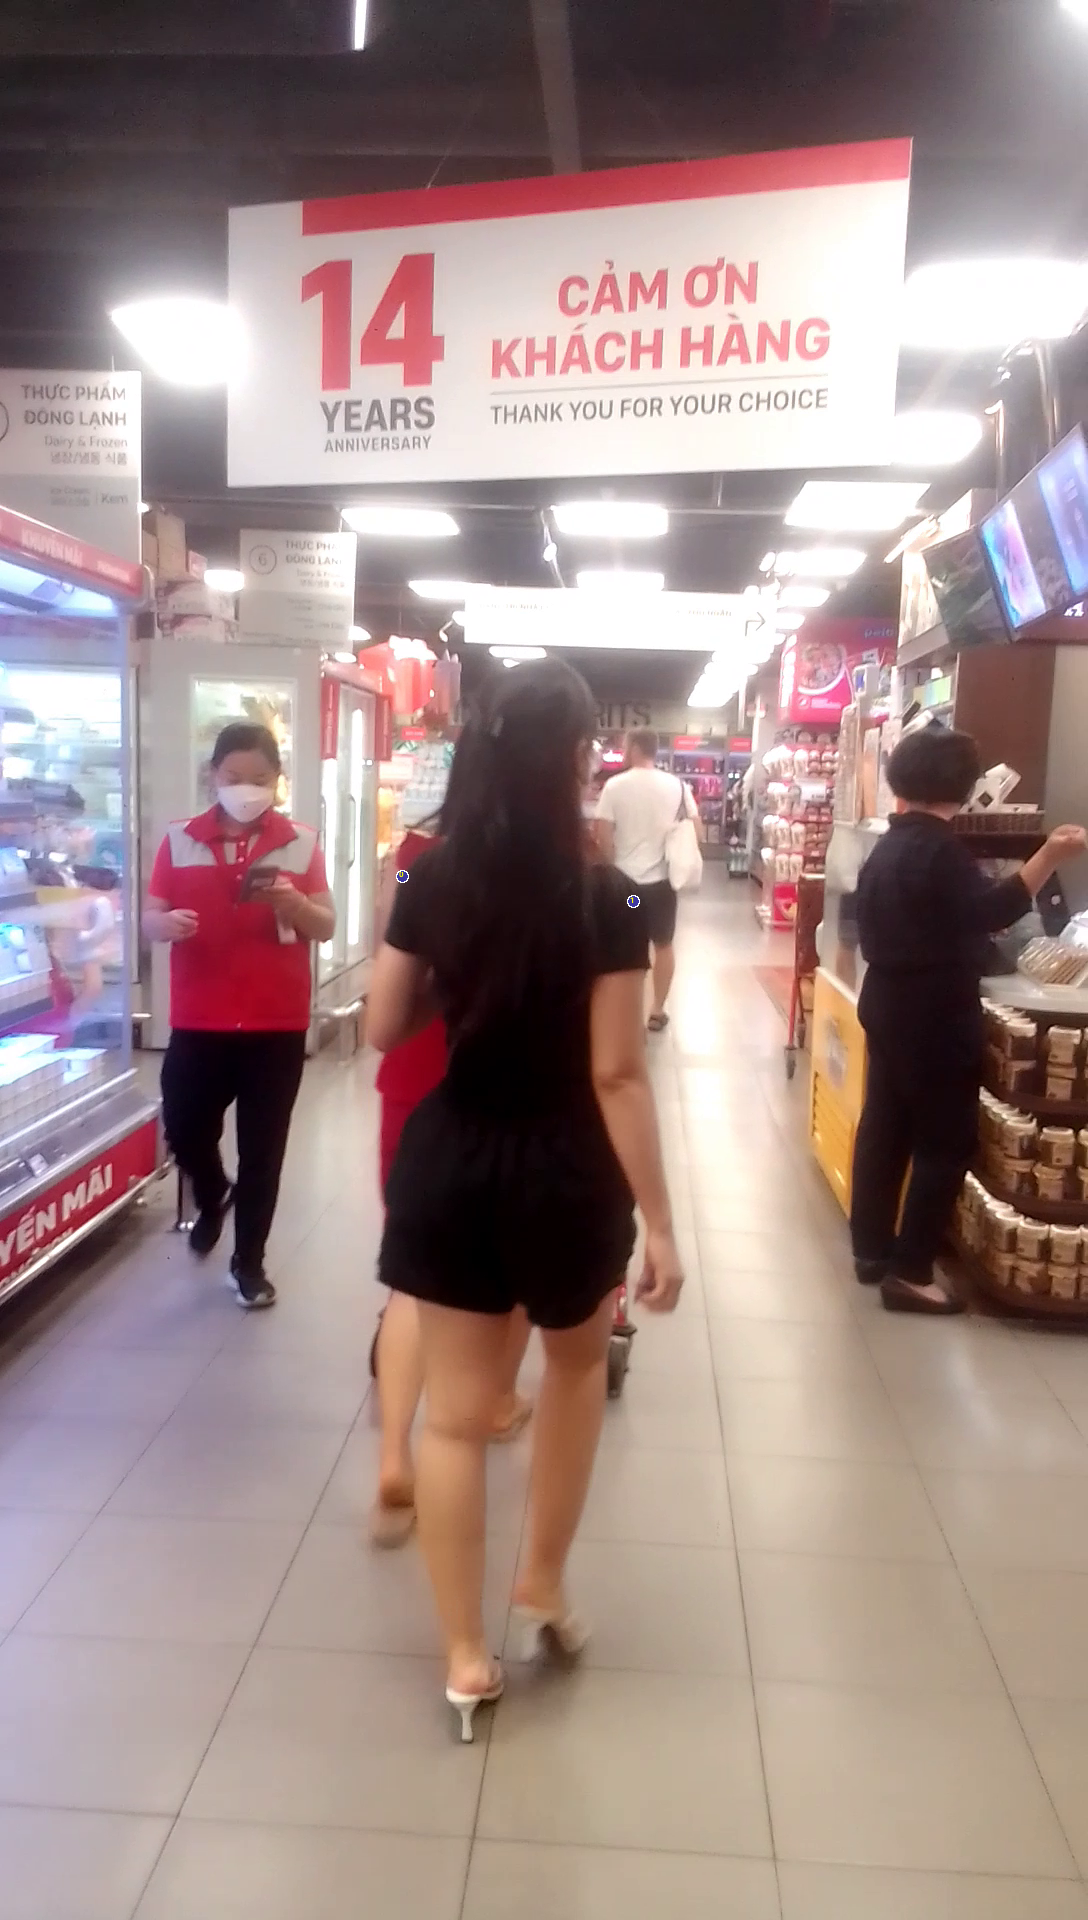

In [22]:
from body_matrix import draw 

output = draw.keypoint_markers(
    coordinates=shoulder_kps,
    image=sample_frame, 
    label_font="/path/Roboto-Bold.ttf"
)
output

In [23]:
from body_matrix import measure

middle_shoulder = measure.find_middle_point(
    shoulder_kps['left_shoulder'], 
    shoulder_kps['right_shoulder']
)

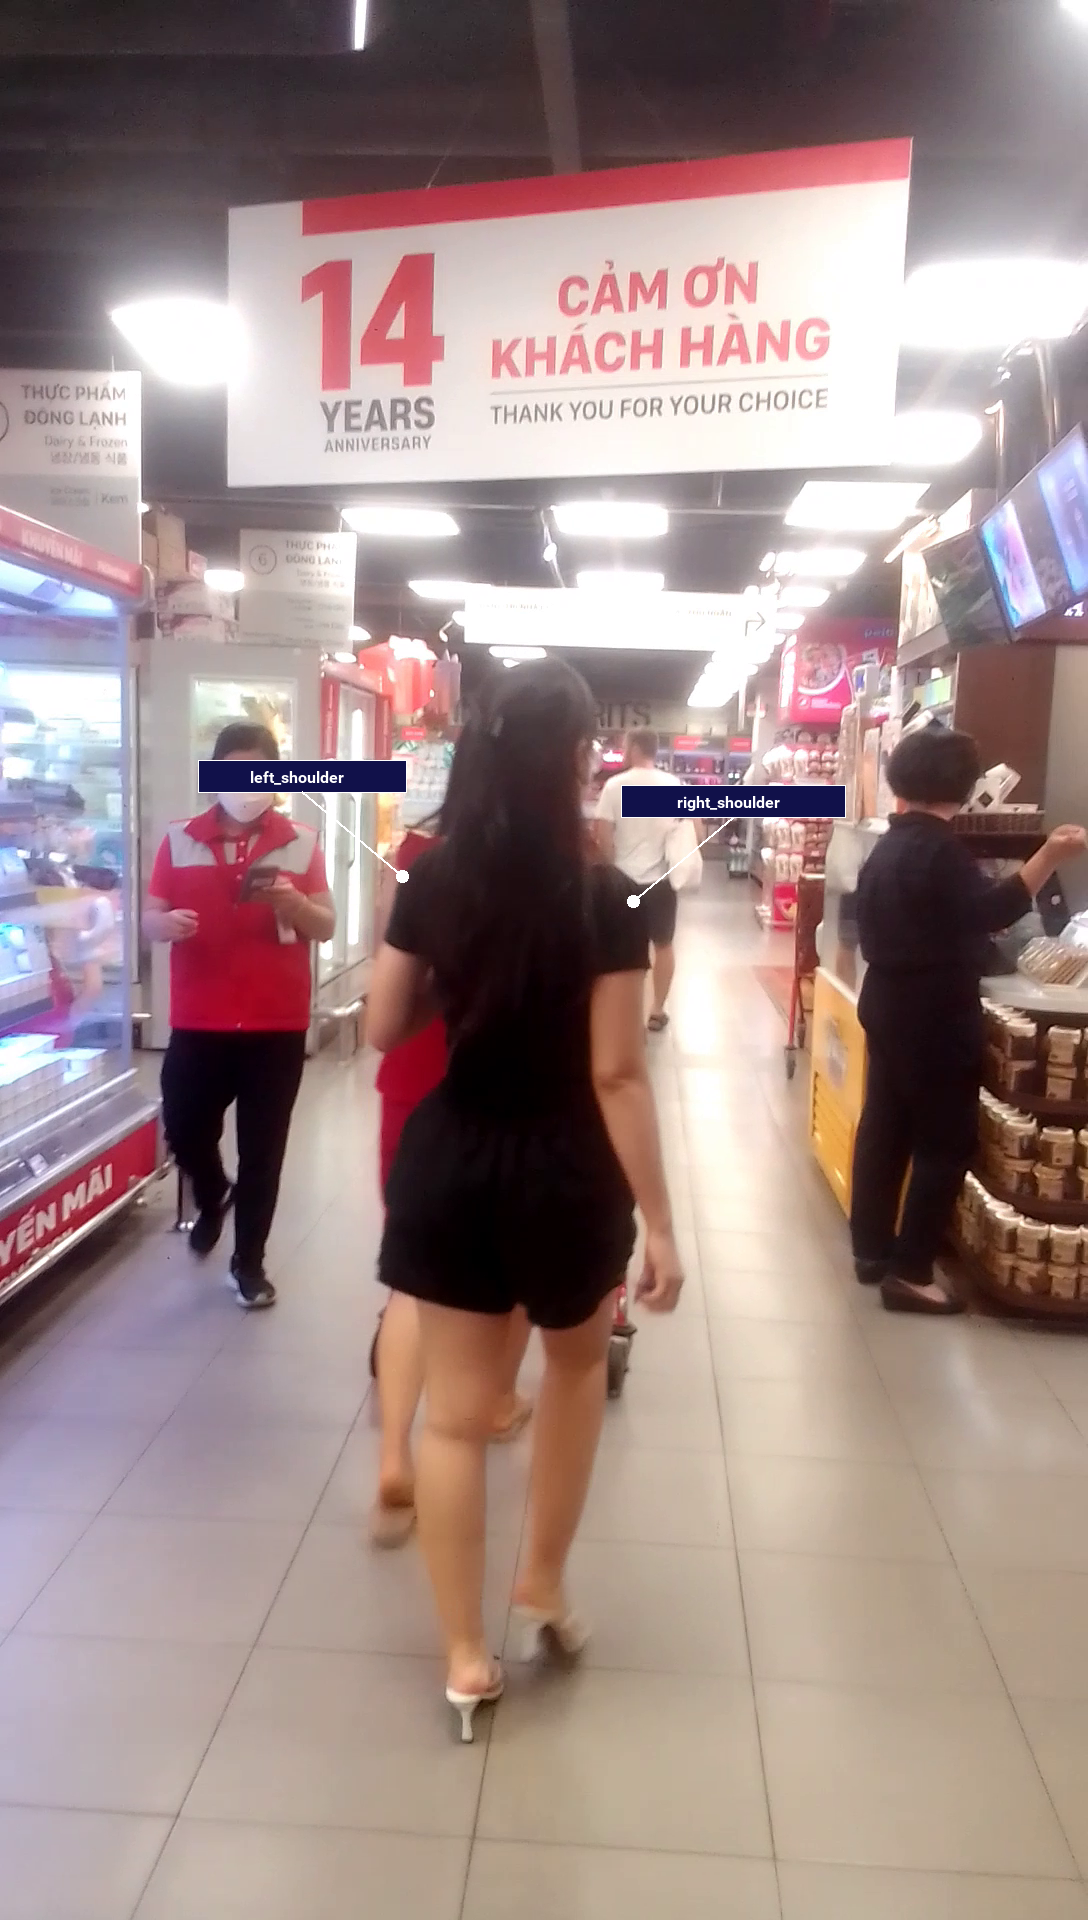

In [24]:
float_sample = sample_frame
for key, value in shoulder_kps.items():
    float_sample = draw.floating_rectangle_label(
        image=float_sample, 
        longitude_coordinate=middle_shoulder[0],
        point=value, 
        label_text=key, 
        label_size=16, 
        label_color="#ffffff", 
        label_font="/Users/troydo42/Desktop/Body_Matrixes/Roboto-Bold.ttf",
        background_color="#11114A"
    ) 
    
float_sample

In [25]:
hip_alpha, hip_beta = two_points_linear_constant(
    selected_kps['left_hip'], 
    selected_kps['right_hip']
)

print(hip_alpha, hip_beta)

0.04767344975390192 1139.9325479080337


In [26]:
hip_line_coordinates = find_segment_line(segment_area, hip_alpha, hip_beta)
hip_line_coordinates

[[392, 1158],
 [393, 1158],
 [394, 1158],
 [395, 1158],
 [396, 1158],
 [397, 1158],
 [398, 1158],
 [399, 1158],
 [400, 1159],
 [401, 1159],
 [402, 1159],
 [403, 1159],
 [404, 1159],
 [405, 1159],
 [406, 1159],
 [407, 1159],
 [408, 1159],
 [409, 1159],
 [410, 1159],
 [411, 1159],
 [412, 1159],
 [413, 1159],
 [414, 1159],
 [415, 1159],
 [416, 1159],
 [417, 1159],
 [418, 1159],
 [419, 1159],
 [420, 1159],
 [421, 1160],
 [422, 1160],
 [423, 1160],
 [424, 1160],
 [425, 1160],
 [426, 1160],
 [427, 1160],
 [428, 1160],
 [429, 1160],
 [430, 1160],
 [431, 1160],
 [432, 1160],
 [433, 1160],
 [434, 1160],
 [435, 1160],
 [436, 1160],
 [437, 1160],
 [438, 1160],
 [439, 1160],
 [440, 1160],
 [441, 1160],
 [442, 1161],
 [443, 1161],
 [444, 1161],
 [445, 1161],
 [446, 1161],
 [447, 1161],
 [448, 1161],
 [449, 1161],
 [450, 1161],
 [451, 1161],
 [452, 1161],
 [453, 1161],
 [454, 1161],
 [455, 1161],
 [456, 1161],
 [457, 1161],
 [458, 1161],
 [459, 1161],
 [460, 1161],
 [461, 1161],
 [462, 1161],
 [463,

In [32]:
lh = selected_kps['left_hip']
rh = selected_kps['right_hip']
print(lh, rh)

[453.56982421875, 1161.5557861328125] [574.3638305664062, 1167.314453125]


In [33]:
mh = measure.find_middle_point(lh, rh)
mh

(513.9668273925781, 1164.4351196289062)

In [29]:
if selected_kps['left_hip'][0] < selected_kps['right_hip'][0]:
    left_middle_hip = measure.two_point_distance(lh,mh)
    right_middle_hip = measure.two_point_distance(lh,mh)
    
    hip_kps = {
        'left_hip': hip_line_coordinates[0],
        'right_hip': hip_line_coordinates[-1]
    }
    
elif selected_kps['left_hip'][0] > selected_kps['right_hip'][0]:
    hip_kps = {
        'left_hip': hip_line_coordinates[-1],
        'right_hip': hip_line_coordinates[0]
    }
    
hip_kps

{'left_hip': [392, 1158], 'right_hip': [666, 1171]}

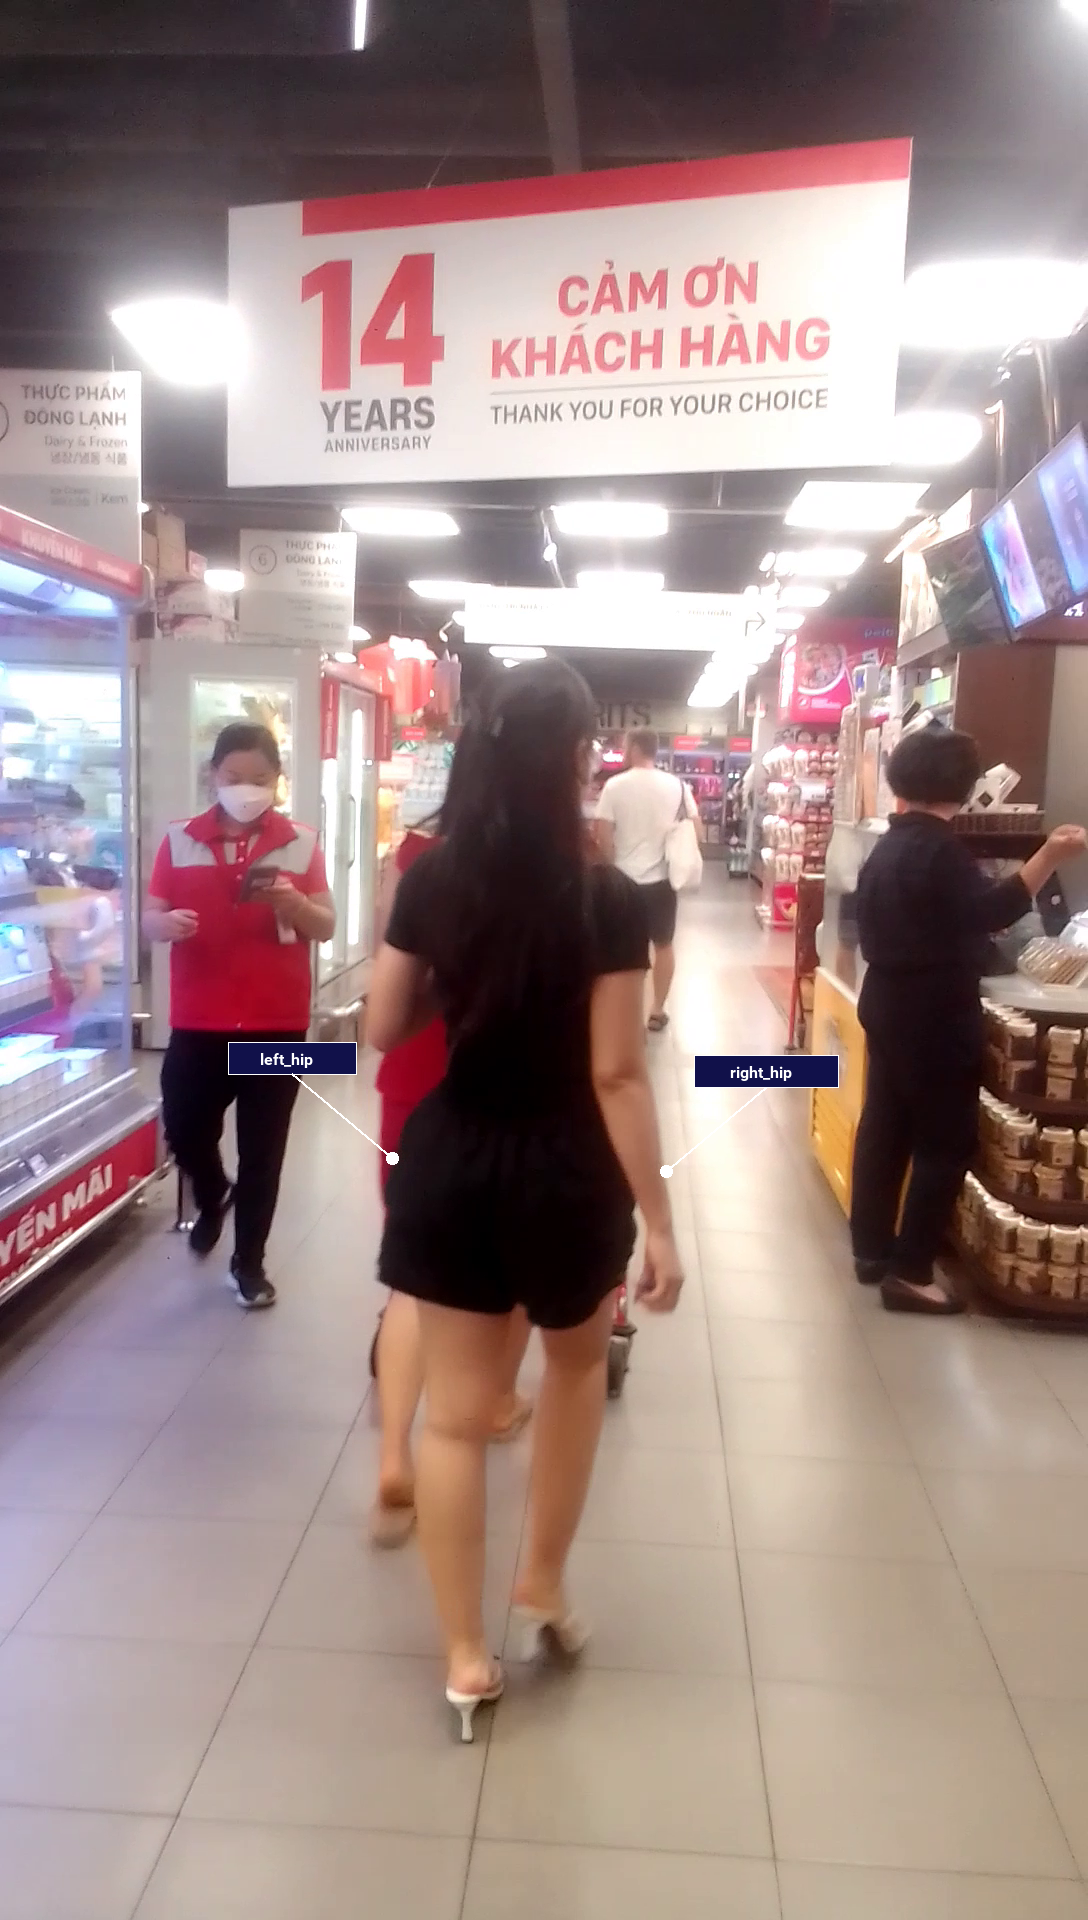

In [30]:
hip_sample = sample_frame

for key, value in hip_kps.items():
    hip_sample = draw.floating_rectangle_label(
        image=hip_sample, 
        longitude_coordinate=middle_shoulder[0],
        point=value, 
        label_text=key, 
        label_size=16, 
        label_color="#ffffff", 
        label_font="/Users/troydo42/Desktop/Body_Matrixes/Roboto-Bold.ttf",
        background_color="#11114A"
    )

hip_sample